In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#importing the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#select only the relevent columns
selected_columns = [
    'Age',
    'Gender',
    'Department',
    'JobRole',
    'MonthlyIncome',
    'YearsAtCompany',
    'OverTime',
    'JobSatisfaction',
    'WorkLifeBalance',
    'Attrition',
    'EducationField'
]

df = df[selected_columns]


In [12]:
#no of row and columns
df.shape



(1470, 11)

In [10]:
#colums names
df.columns

Index(['Age', 'Gender', 'Department', 'JobRole', 'MonthlyIncome',
       'YearsAtCompany', 'OverTime', 'JobSatisfaction', 'WorkLifeBalance',
       'Attrition', 'EducationField'],
      dtype='object')

In [5]:
#encoding the attrition column to change it to integer
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [6]:
#check for the data types of variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1470 non-null   int64 
 1   Gender           1470 non-null   object
 2   Department       1470 non-null   object
 3   JobRole          1470 non-null   object
 4   MonthlyIncome    1470 non-null   int64 
 5   YearsAtCompany   1470 non-null   int64 
 6   OverTime         1470 non-null   object
 7   JobSatisfaction  1470 non-null   int64 
 8   WorkLifeBalance  1470 non-null   int64 
 9   Attrition        1470 non-null   int64 
 10  EducationField   1470 non-null   object
dtypes: int64(6), object(5)
memory usage: 126.5+ KB


In [7]:
#check for missing values
df.isnull().sum()


Age                0
Gender             0
Department         0
JobRole            0
MonthlyIncome      0
YearsAtCompany     0
OverTime           0
JobSatisfaction    0
WorkLifeBalance    0
Attrition          0
EducationField     0
dtype: int64

In [8]:
#understand the dataset by unique values and its count for each variables
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("---------------")


Age
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
---------------
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
---------------
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
---------------
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count,

In [13]:
#Basic business sanity checks
df.describe()


,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,7.008163,2.728571,2.761224,0.161224
std,9.135373,4707.956783,6.126525,1.102846,0.706476,0.367863
min,18.000000,1009.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,2911.000000,3.000000,2.000000,2.000000,0.000000
50%,36.000000,4919.000000,5.000000,3.000000,3.000000,0.000000
75%,43.000000,8379.000000,9.000000,4.000000,3.000000,0.000000
max,60.000000,19999.000000,40.000000,4.000000,4.000000,1.000000


In [14]:
#save the cleaned dataset 
df.to_csv("hr_attrition_clean.csv", index=False)


In [15]:
df = pd.read_csv("hr_attrition_clean.csv")


In [16]:
df.head

<bound method NDFrame.head of       Age  Gender              Department                    JobRole  \
0      41  Female                   Sales            Sales Executive   
1      49    Male  Research & Development         Research Scientist   
2      37    Male  Research & Development      Laboratory Technician   
3      33  Female  Research & Development         Research Scientist   
4      27    Male  Research & Development      Laboratory Technician   
...   ...     ...                     ...                        ...   
1465   36    Male  Research & Development      Laboratory Technician   
1466   39    Male  Research & Development  Healthcare Representative   
1467   27    Male  Research & Development     Manufacturing Director   
1468   49    Male                   Sales            Sales Executive   
1469   34    Male  Research & Development      Laboratory Technician   

      MonthlyIncome  YearsAtCompany OverTime  JobSatisfaction  \
0              5993               6     

In [18]:
#Calculate overall attrition rate
total_employees = df.shape[0]
employees_left = df['Attrition'].sum()

attrition_rate = (employees_left / total_employees) * 100
attrition_rate

#print clearly
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")


Overall Attrition Rate: 16.12%


In [19]:
#Attrition count
df['Attrition'].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [20]:
#Attrition by department in percentage
dept_attrition = (
    df.groupby('Department')['Attrition']
    .mean()
    .sort_values(ascending=False)
    * 100
)

dept_attrition


Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64

In [23]:
#Make it to data frame
dept_attrition_df = dept_attrition.reset_index()
dept_attrition_df.columns = ['Department', 'AttritionRate']
dept_attrition_df


,Department,AttritionRate
0,Sales,20.627803
1,Human Resources,19.047619
2,Research & Development,13.839750


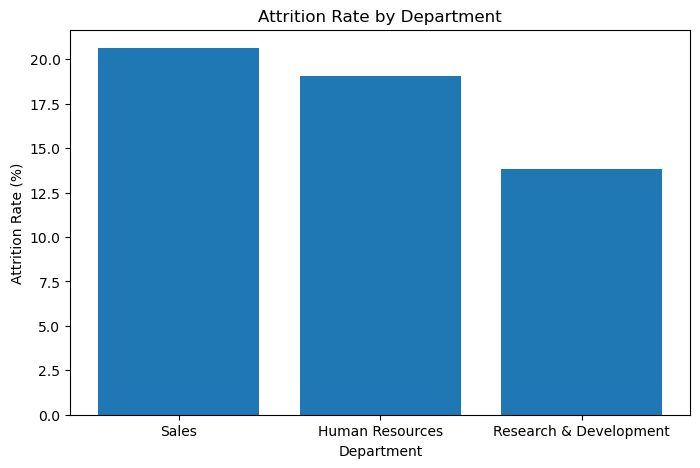

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(dept_attrition_df['Department'], dept_attrition_df['AttritionRate'])
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.show()


In [25]:
#Calculate attrition rate by overtime
overtime_attrition = (
    df.groupby('OverTime')['Attrition']
    .mean()
    * 100
)

overtime_attrition


OverTime
No     10.436433
Yes    30.528846
Name: Attrition, dtype: float64

In [26]:
#convert to dataframe
overtime_df = overtime_attrition.reset_index()
overtime_df.columns = ['OverTime', 'AttritionRate']
overtime_df


,OverTime,AttritionRate
0,No,10.436433
1,Yes,30.528846


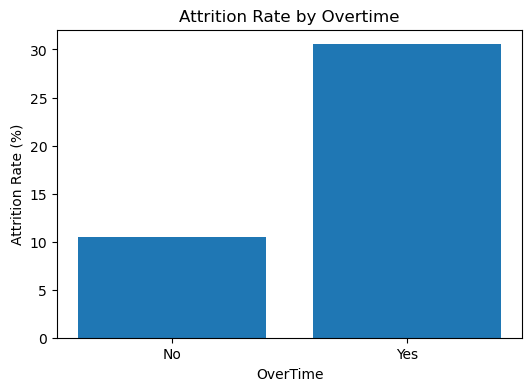

In [27]:
#plot attrition rate by overtime
plt.figure(figsize=(6,4))
plt.bar(overtime_df['OverTime'], overtime_df['AttritionRate'])
plt.title('Attrition Rate by Overtime')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('OverTime')
plt.show()


In [28]:
#grouping income for better claarity(business friendly)
df['IncomeBand'] = pd.qcut(
    df['MonthlyIncome'],
    q=3,
    labels=['Low Income', 'Medium Income', 'High Income']
)


In [29]:
#Calculate attrition rate by income band
income_attrition = (
    df.groupby('IncomeBand')['Attrition']
    .mean()
    * 100
)

income_attrition


C:\Users\fathi\AppData\Local\Temp\ipykernel_4800\2586269761.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('IncomeBand')['Attrition']


IncomeBand
Low Income       26.122449
Medium Income    11.632653
High Income      10.612245
Name: Attrition, dtype: float64

In [30]:
#convert to dataframe
income_df = income_attrition.reset_index()
income_df.columns = ['IncomeBand', 'AttritionRate']
income_df


,IncomeBand,AttritionRate
0,Low Income,26.122449
1,Medium Income,11.632653
2,High Income,10.612245


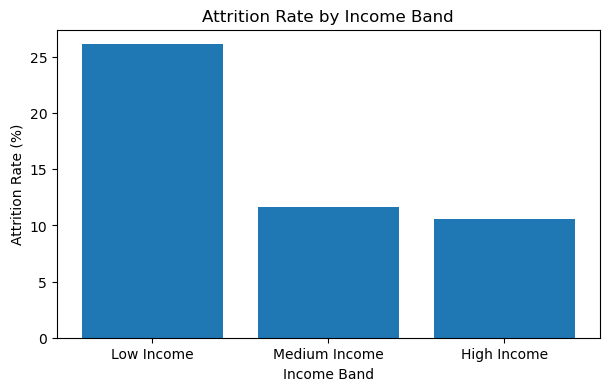

In [31]:
#plot attrition rate by income band
plt.figure(figsize=(7,4))
plt.bar(income_df['IncomeBand'], income_df['AttritionRate'])
plt.title('Attrition Rate by Income Band')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Income Band')
plt.show()


In [32]:
#tensure group created for yearsat company for more clarity
df['TenureGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=[0, 2, 5, 10, 40],
    labels=['0–2 years', '3–5 years', '6–10 years', '10+ years']
)


In [36]:
df['TenureGroup'].value_counts()


TenureGroup
6–10 years    448
3–5 years     434
0–2 years     298
10+ years     246
Name: count, dtype: int64

In [38]:
#Calculate attrition rate by tenure group
tenure_attrition = (
    df.groupby('TenureGroup')['Attrition']
    .mean()
    * 100
)

tenure_attrition


C:\Users\fathi\AppData\Local\Temp\ipykernel_4800\529904005.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureGroup')['Attrition']


TenureGroup
0–2 years     28.859060
3–5 years     13.824885
6–10 years    12.276786
10+ years      8.130081
Name: Attrition, dtype: float64

In [39]:
#convert to dataframe
tenure_df = tenure_attrition.reset_index()
tenure_df.columns = ['TenureGroup', 'AttritionRate']
tenure_df


,TenureGroup,AttritionRate
0,0–2 years,28.859060
1,3–5 years,13.824885
2,6–10 years,12.276786
3,10+ years,8.130081


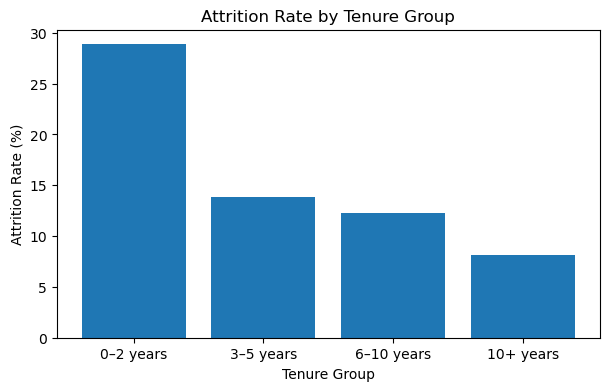

In [40]:
#plot attrition rate by tenture group
plt.figure(figsize=(7,4))
plt.bar(tenure_df['TenureGroup'], tenure_df['AttritionRate'])
plt.title('Attrition Rate by Tenure Group')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Tenure Group')
plt.show()


In [41]:
#Calculate attrition rate by job satisfaction
job_sat_attrition = (
    df.groupby('JobSatisfaction')['Attrition']
    .mean()
    * 100
)

job_sat_attrition


JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Attrition, dtype: float64

In [42]:
#convert to dataframe
job_sat_df = job_sat_attrition.reset_index()
job_sat_df.columns = ['JobSatisfaction', 'AttritionRate']
job_sat_df


,JobSatisfaction,AttritionRate
0,1,22.837370
1,2,16.428571
2,3,16.515837
3,4,11.328976


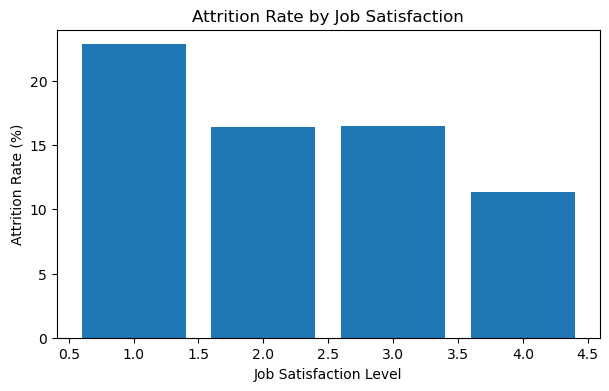

In [44]:
#plot attrition by job satisfaction
plt.figure(figsize=(7,4))
plt.bar(job_sat_df['JobSatisfaction'], job_sat_df['AttritionRate'])
plt.title('Attrition Rate by Job Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Job Satisfaction Level')
plt.show()


In [45]:
#Calculate Attrition Rate by Work-Life Balance
wlb_attrition = (
    df.groupby('WorkLifeBalance')['Attrition']
    .mean()
    * 100
)

wlb_attrition


WorkLifeBalance
1    31.250000
2    16.860465
3    14.221725
4    17.647059
Name: Attrition, dtype: float64

In [46]:
#convert to dataframe
wlb_df = wlb_attrition.reset_index()
wlb_df.columns = ['WorkLifeBalance', 'AttritionRate']
wlb_df


,WorkLifeBalance,AttritionRate
0,1,31.250000
1,2,16.860465
2,3,14.221725
3,4,17.647059


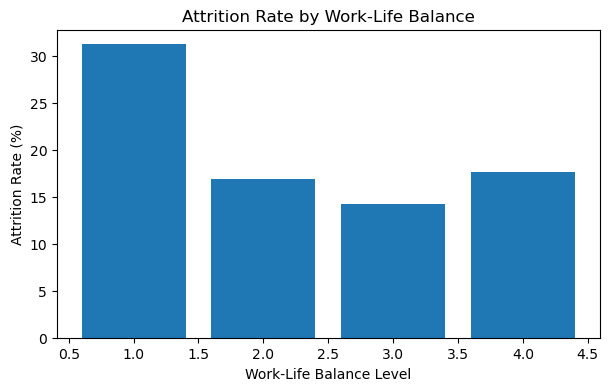

In [47]:
#plot work life balance vsattrition
plt.figure(figsize=(7,4))
plt.bar(wlb_df['WorkLifeBalance'], wlb_df['AttritionRate'])
plt.title('Attrition Rate by Work-Life Balance')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Work-Life Balance Level')
plt.show()
